In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle 
%matplotlib inline

In [9]:
## Loading the dataset

#boston = datasets.load_boston()
#features = pd.DataFrame(boston.data,columns=boston.feature_names)
#targets = boston.target

df=pd.read_csv('boston.csv')

In [10]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Performing Data Analytics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### As we can see abov, every feature has numerical values

In [15]:
for x in df.columns:
    print(f"{x} has {len(df[x].unique())} unqiue values")

CRIM has 504 unqiue values
ZN has 26 unqiue values
INDUS has 76 unqiue values
CHAS has 2 unqiue values
NOX has 81 unqiue values
RM has 446 unqiue values
AGE has 356 unqiue values
DIS has 412 unqiue values
RAD has 9 unqiue values
TAX has 66 unqiue values
PTRATIO has 46 unqiue values
B has 357 unqiue values
LSTAT has 455 unqiue values
MEDV has 229 unqiue values


In [18]:
#let's check for continuous and discrete features
for x in df.columns:
    if len(df[x].unique())>9:
        print(f"{x} has {len(df[x].unique())} continuous values")

CRIM has 504 continuous values
ZN has 26 continuous values
INDUS has 76 continuous values
NOX has 81 continuous values
RM has 446 continuous values
AGE has 356 continuous values
DIS has 412 continuous values
TAX has 66 continuous values
PTRATIO has 46 continuous values
B has 357 continuous values
LSTAT has 455 continuous values
MEDV has 229 continuous values


#### Above are the features which can  be categorized as continuous/discrete

In [21]:
#let's check for Categorical Variable
for x in df.columns:
    if len(df[x].unique())<=9:
        print(f"{x} has {len(df[x].unique())} categorical values")

CHAS has 2 categorical values
RAD has 9 categorical values


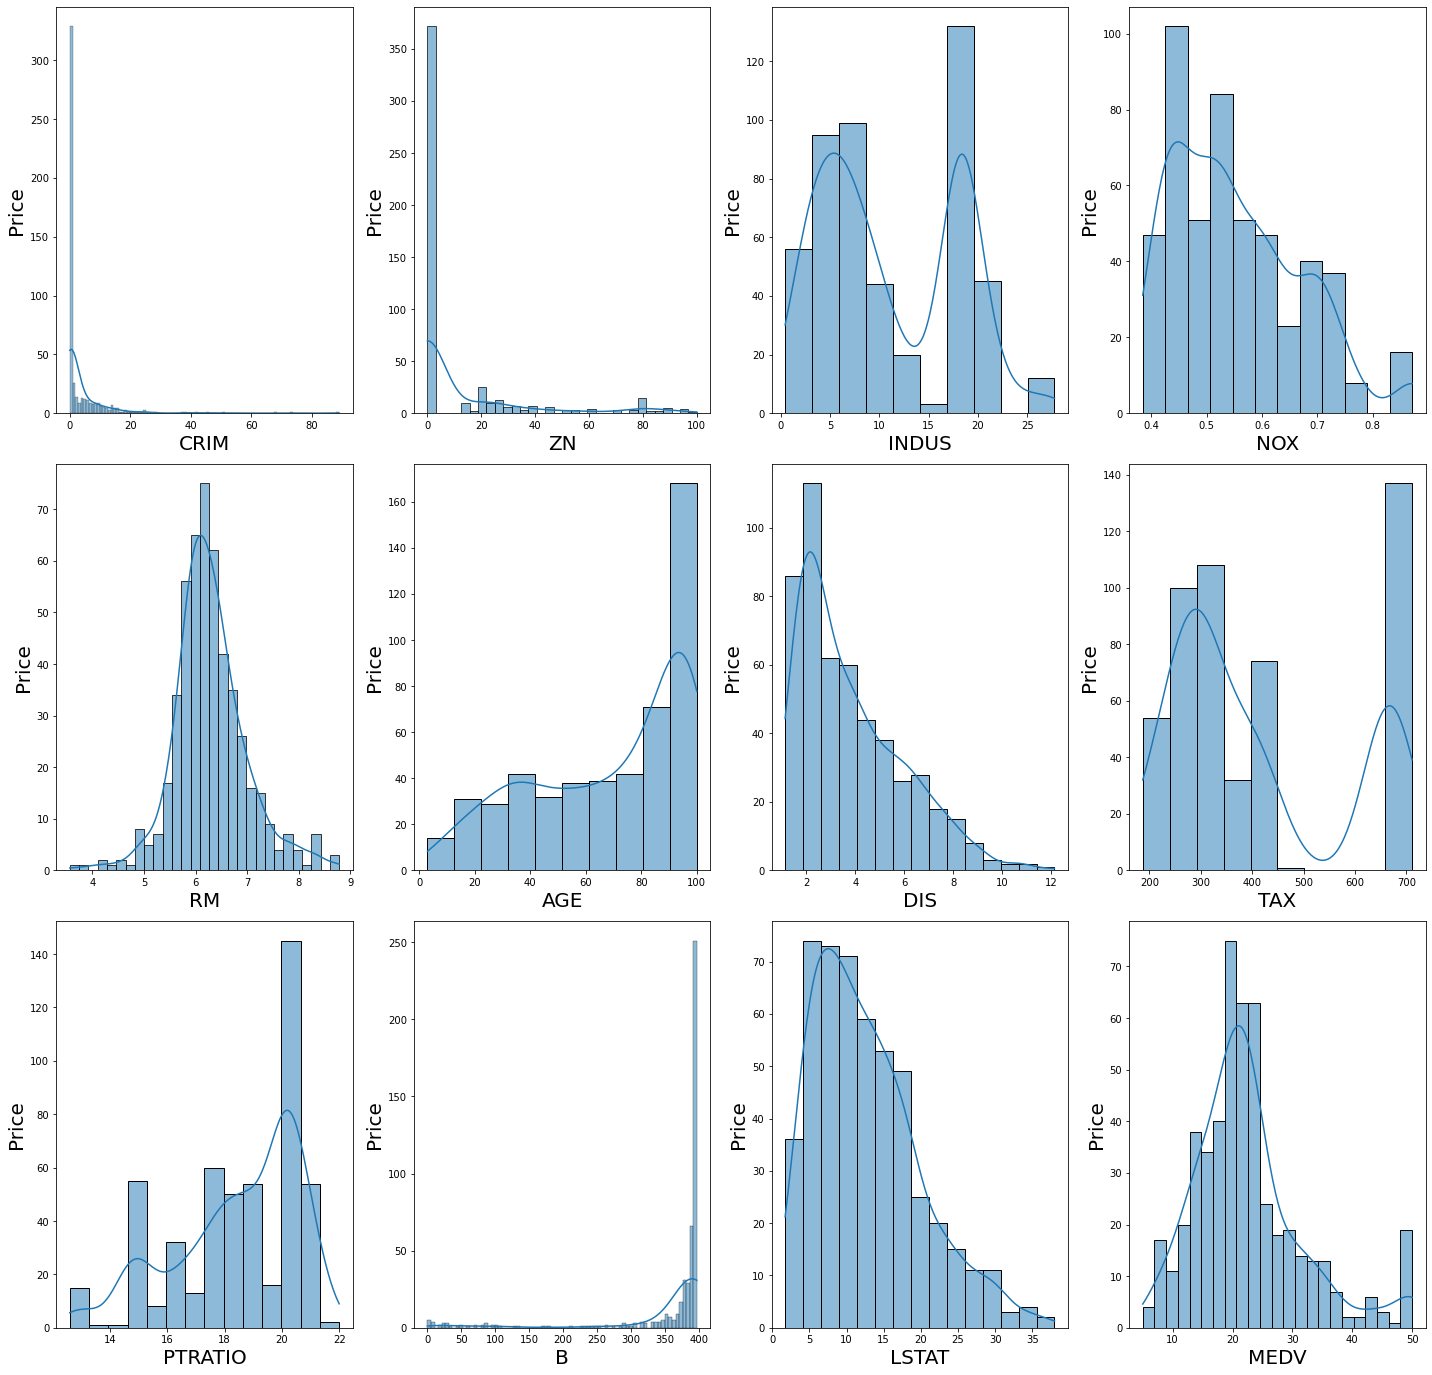

In [26]:
#Plotting the Categorical Variables
#let's check for continuous and discrete features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for x in df.columns:
    if len(df[x].unique())>9:
        # let's see how data is distributed for every column
        if plotnumber<=16 :
            ax = plt.subplot(4,4,plotnumber)
            sns.histplot(df[x],kde=2)
            plt.xlabel(x,fontsize=20)
            plt.ylabel('Price',fontsize=20)
            plotnumber+=1
plt.tight_layout()

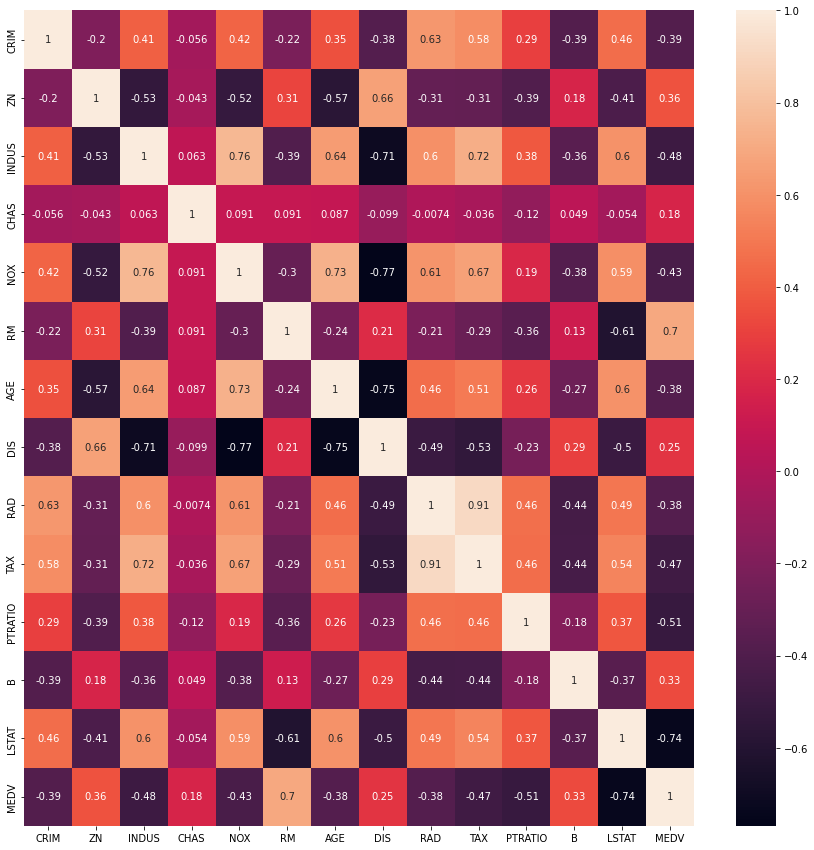

In [27]:
#let's see the correlation b/w each feature
corr_graph=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_graph,annot=True)
plt.show()

In [37]:
#Checking for vif correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df.drop(columns=['MEDV'])

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = df.drop(columns=['MEDV']).columns
vif

,VIF,Features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


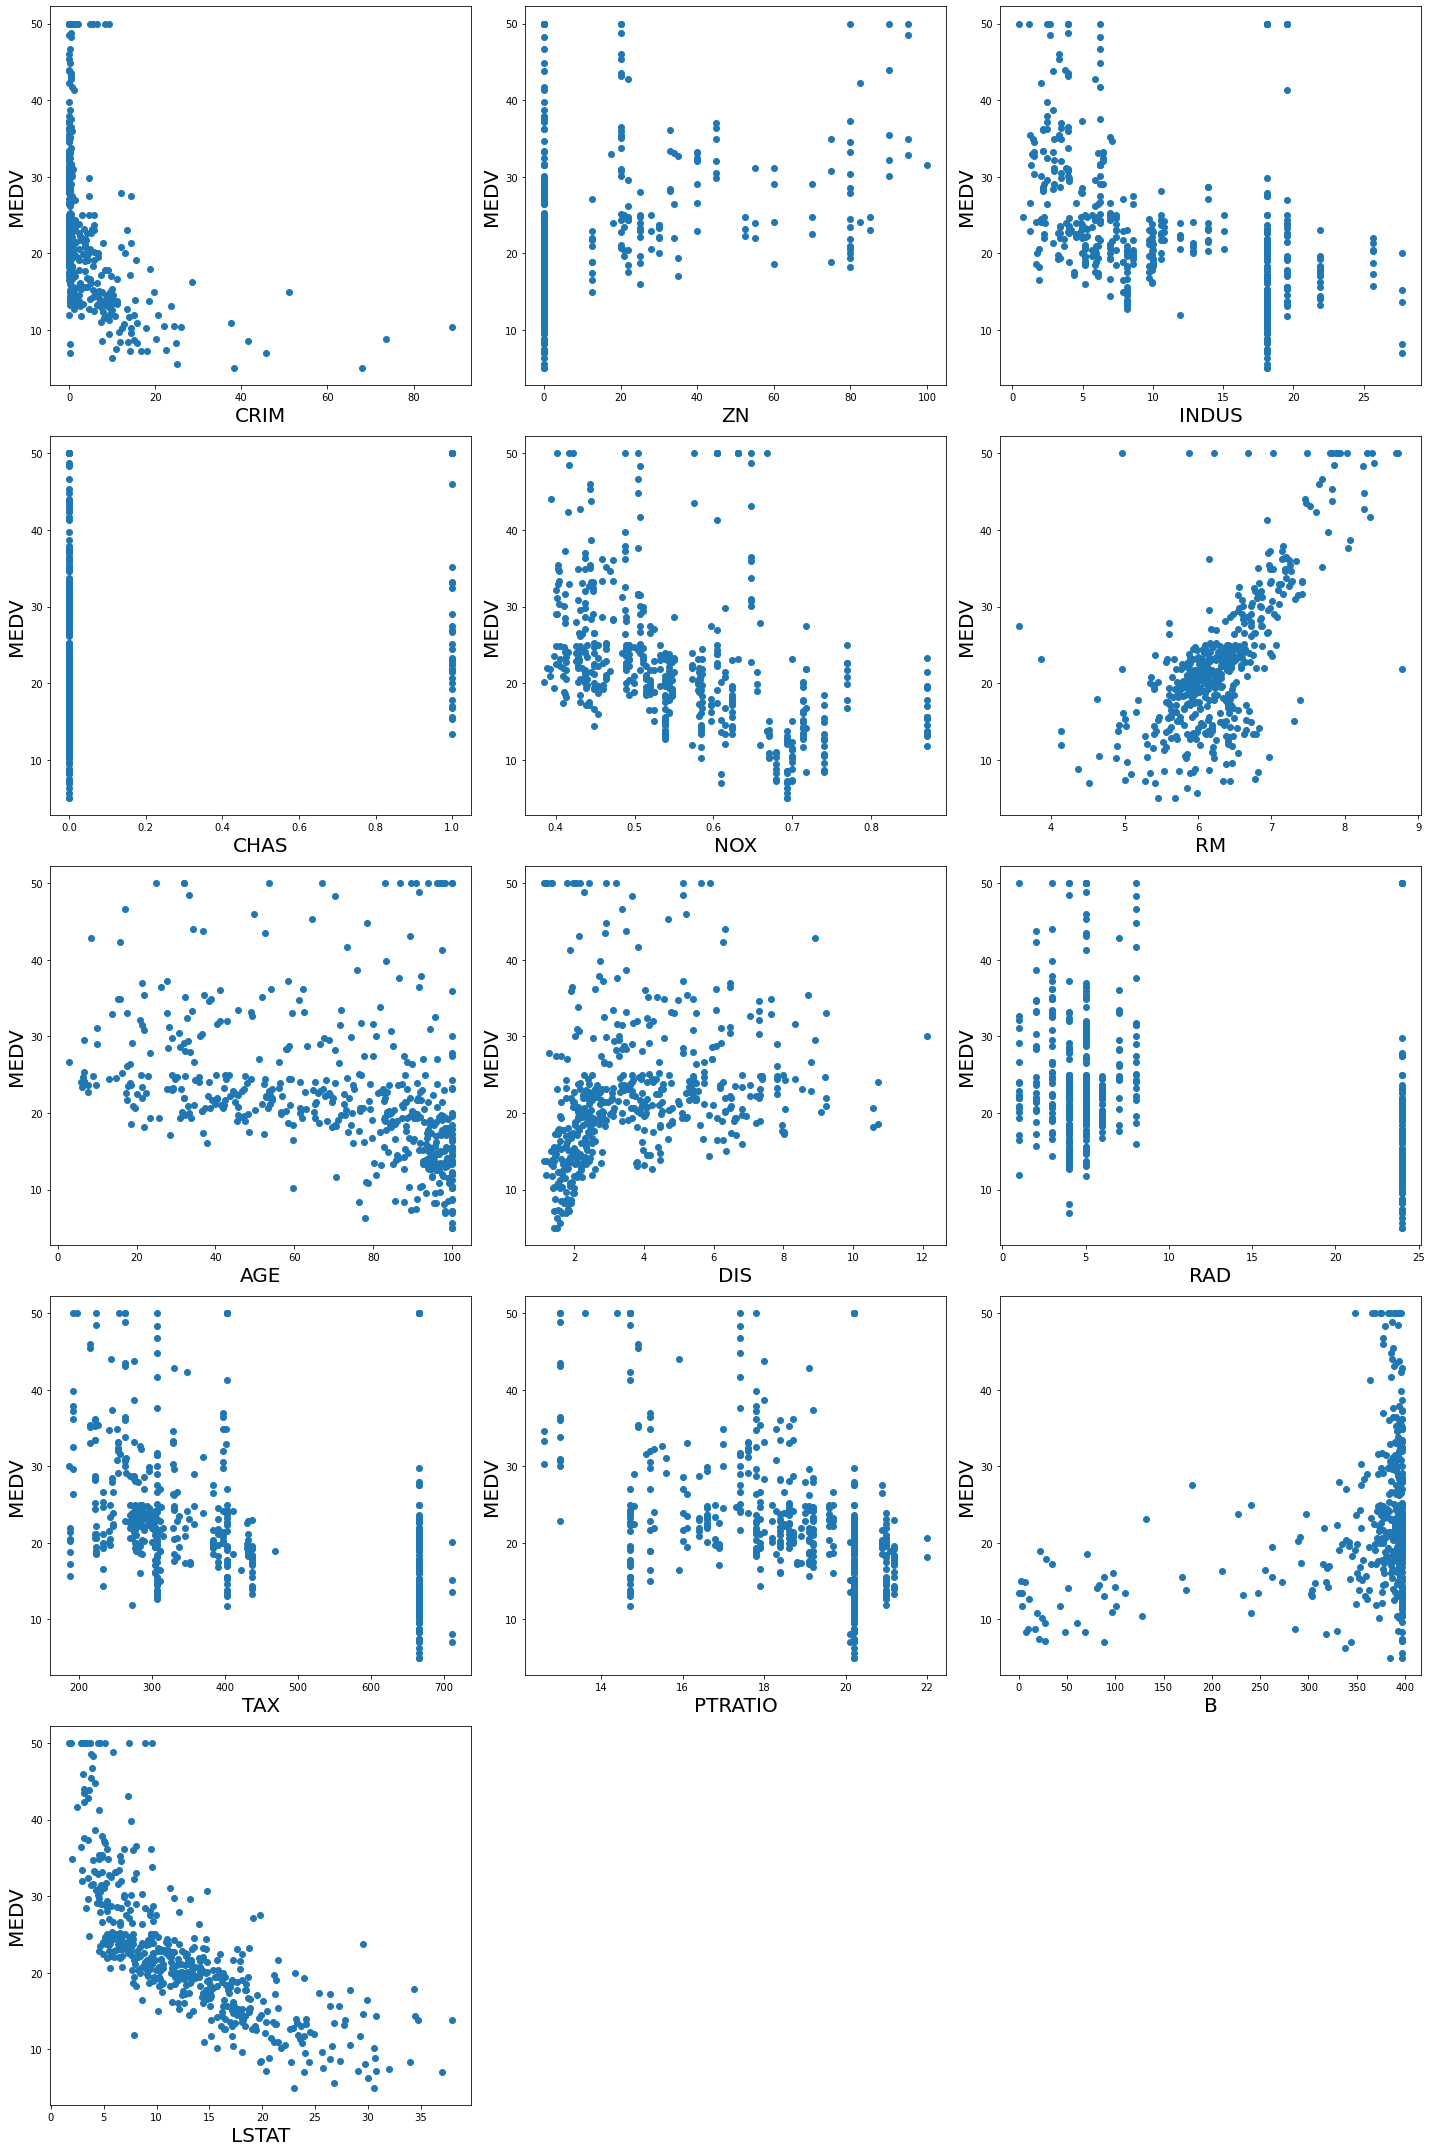

In [43]:
#Lets check the relationship between our Y and X i.e Independent and Dependent Variable
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
y=df['MEDV']
for column in df.drop(columns=['MEDV']):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df.drop(columns=['MEDV'])[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Data Transformation

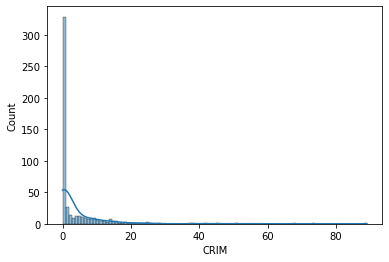

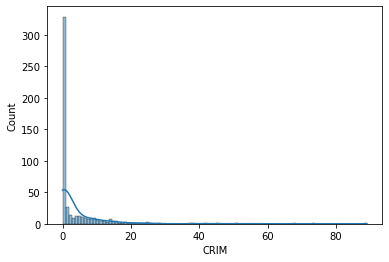

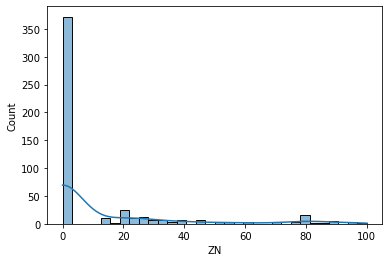

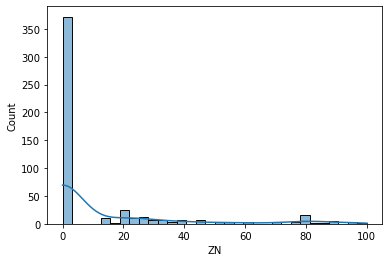

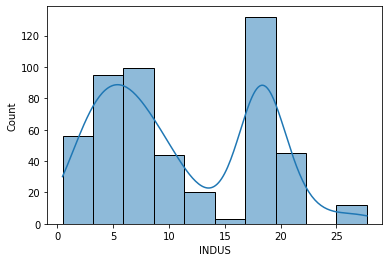

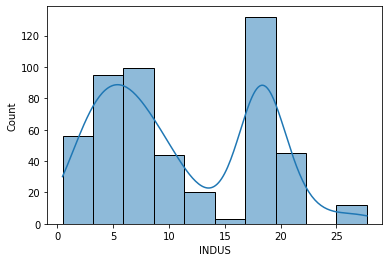

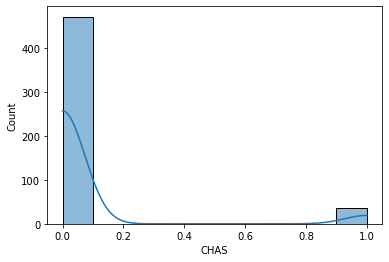

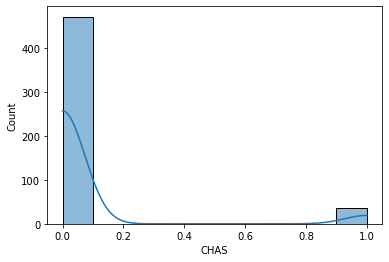

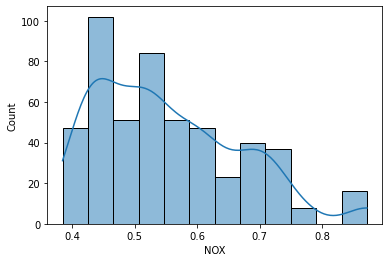

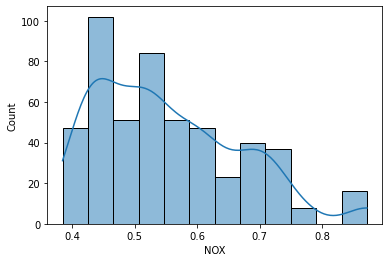

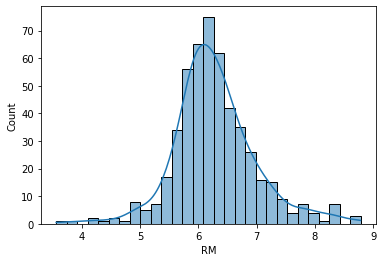

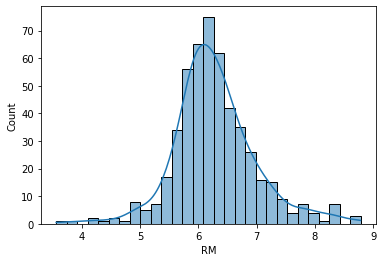

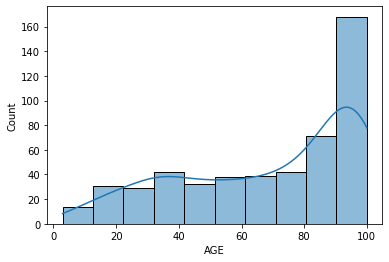

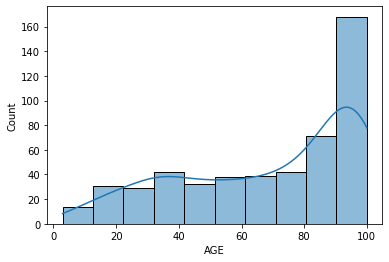

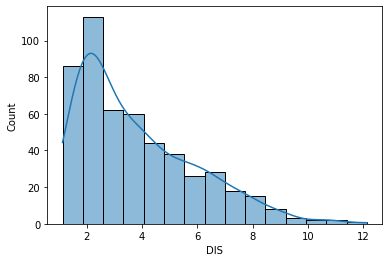

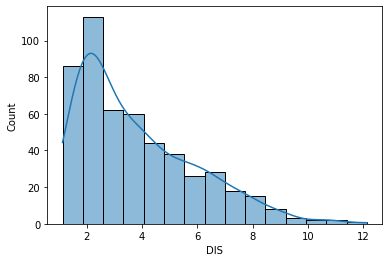

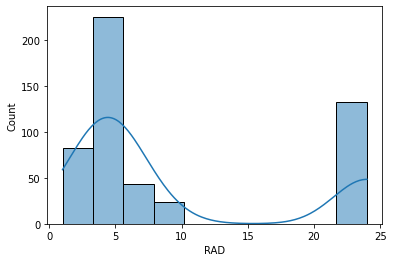

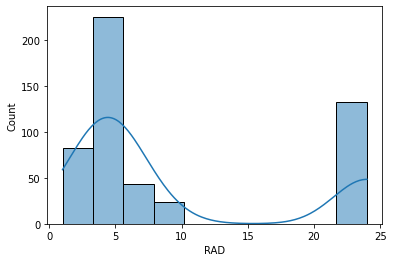

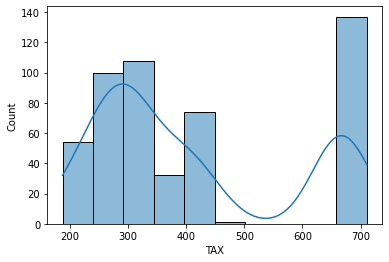

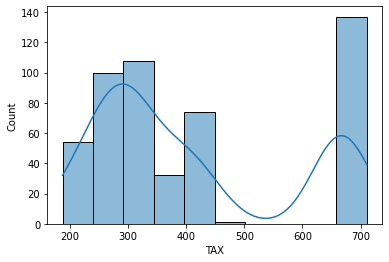

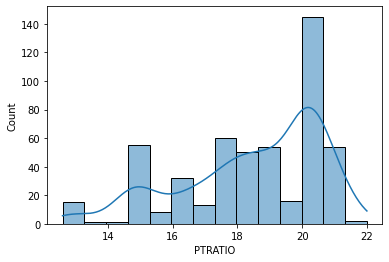

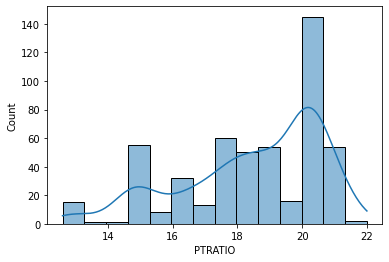

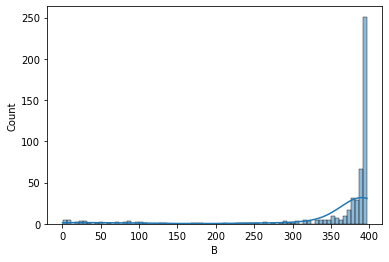

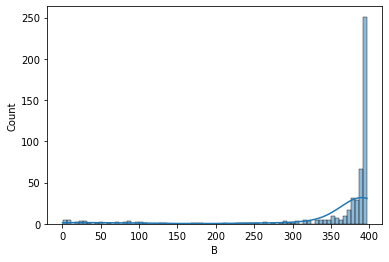

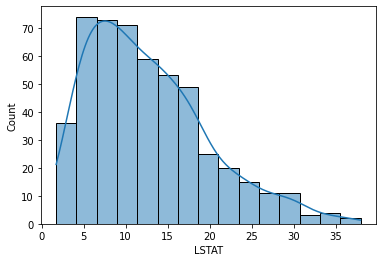

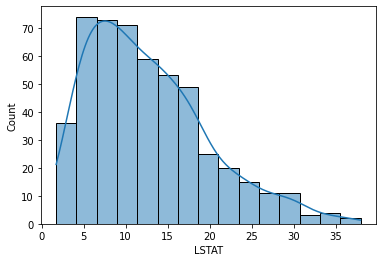

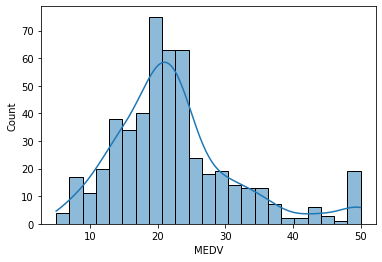

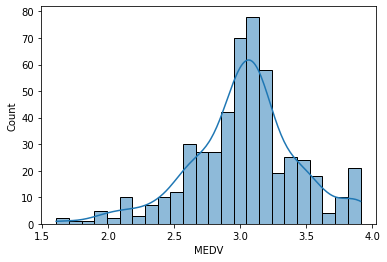

In [62]:
#Doing the Log Transformation
cont_x=[x for x in df.columns if len(df[x].unique()>9)]
for x in cont_x:
    scaled_data=df.copy()
    if 0 in scaled_data[x].unique():
        pass
    else:
        scaled_data[x]=np.log(scaled_data[x])
    sns.histplot(df[x],kde=1)
    plt.show()
    sns.histplot(data[x],kde=1)
    plt.show()
    

In [63]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [65]:
for x in df.columns:
    if 0 not in df[x].unique():
        df[x]=np.log(df[x])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


####  Above, We did the log Transformation as it kind of Normalize the whole Data

# Scaling and Test/Train Split

In [66]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=111)

In [68]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.60543
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.21266


In [69]:
y.head(2)

0    3.178054
1    3.072693
Name: MEDV, dtype: float64

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [72]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.274384,3.783814,-2.318922,-0.281546,-1.514536,1.035546,-2.330158,1.616926,-0.934905,0.123518,-0.683864,0.300933,-1.485007
1,-0.665151,-0.461946,-0.044466,-0.281546,-0.231854,0.766524,0.259386,-0.248147,-0.337227,0.008209,1.037633,0.296922,-0.600630
2,1.869628,-0.461946,0.922218,-0.281546,1.263992,-2.827329,0.828554,-1.508506,1.498090,1.394262,0.753685,0.300933,1.618569
3,-0.793844,-0.461946,0.477967,-0.281546,-1.106941,-0.180511,-0.485339,0.431531,-0.337227,0.098346,0.110556,0.270397,-0.104164
4,-0.895498,-0.461946,-1.010596,-0.281546,-0.329571,-0.368751,-0.434677,0.165987,-0.337227,-0.646959,-0.882328,0.289749,-0.130869


In [73]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.317559,0.789436,0.683135,-0.281546,-0.805250,-0.070861,-1.260064,0.224164,-0.598310,-0.878378,-0.115341,0.299203,-0.959752
1,0.129883,-0.461946,-0.460865,-0.281546,-0.359259,0.534473,0.469842,0.009138,0.212688,-0.555113,-0.490016,0.300933,-0.616223
2,-1.336339,2.889970,-1.419716,-0.281546,-1.211662,0.501270,-1.734433,0.957424,-0.934905,-1.052042,-0.069669,0.297074,-1.576962
3,-0.762755,-0.461946,1.372287,-0.281546,0.326334,-0.462682,0.704639,-0.841858,-1.409309,-1.789530,0.286967,0.242479,0.843573
4,-1.223238,3.783814,-1.543632,-0.281546,-1.353559,2.166300,-1.026678,0.855553,-0.598310,-1.348518,-1.895504,0.288370,-1.790620


#### Saving the Scaler Model, will be needed later

In [75]:
pickle.dump(scaler,open('./scaler.pkl','wb'))

# Model Training Start:

In [76]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

## Model Evaluation

In [78]:
print(f"Accuracy on the Train data is {100*r2_score(y_train,model.predict(X_train))} % for our Random Forest Regression model.")
print(f"Accuracy on the Train data is {100*r2_score(y_test,model.predict(X_test))} % for our Random Forest Regression model.")

Accuracy on the Train data is 97.48256929346178 % for our Random Forest Regression model.
Accuracy on the Train data is 86.06555541362401 % for our Random Forest Regression model.


In [80]:
y_predicted=model.predict(X_test)
y_predicted[0]

3.1840180115779573

In [120]:
cnt=0
actual=[]
for i in y_test:
    if cnt<=5:
        actual.append(i)
        cnt+=1
pred_df=pd.DataFrame(columns=['Predicted','Actual'])
pred_df['Predicted']=y_predicted[:5]
pred_df['Actual']=actual[:5]

In [121]:
pred_df

,Predicted,Actual
0,3.184018,3.218876
1,3.220002,3.404525
2,3.341210,3.427515
3,2.913953,3.020425
4,3.856696,3.881564


In [129]:
print('MAE:', mean_absolute_error(y_test, y_predicted))
print('MSE:', mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predicted)))

MAE: 0.11272241537055945
MSE: 0.025822541083531745
RMSE: 0.16069393605090312


### As we can see model Prediction is Quite good, Let's Try with CV Techniques

In [130]:
parameter ={
 "criterion" : ["squared_error", "absolute_error", "poisson"],
 "max_depth" : [1,2,3,4,5,6,7,9,9,10,None],
 "max_features": ['sqrt', 'log2', None]
}

In [131]:
model_cv=GridSearchCV(model,param_grid=parameter,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 9, 9, 10, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='neg_mean_squared_error')

In [132]:
model_cv.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2'}

In [133]:
model_cv.best_score_

-0.022274405162453537

## Model Evaluation by Model_cv:

In [137]:
print(f"Accuracy on the Train data is {100*r2_score(y_train,model_cv.predict(X_train))} % for our Grid Search Random Forest Regression model.")
print(f"Accuracy on the Test data is {100*r2_score(y_test,model_cv.predict(X_test))} % for our Grid Search Random Forest Regression model.")

Accuracy on the Train data is 98.02703860029132 % for our Grid Search Random Forest Regression model.
Accuracy on the Test data is 85.03638713424972 % for our Grid Search Random Forest Regression model.


### As we can see, Our base Model was slightly better than GridCV model

In [139]:
pickle.dump(model,open('./basemodel.pkl','wb'))



# Model Prediction:

In [184]:
x_input=[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]
x_input1=list(X_test.iloc[0,])
print(len(x_input1),"\n",len(x_input))

13 
 13


In [196]:
y_test[0]

3.1780538303479458

### Scaler Object Load

In [173]:
sacler_object = './scaler.pkl' 
scaler = pickle.load(open(sacler_object, 'rb'))

### Model Load

In [174]:
model_object = './basemodel.pkl'
model = pickle.load(open(model_object, 'rb'))

13

## Log_Transformation for Input Data:

In [192]:
def log_transform_input(x_input):
    x_input_final=[]
    for i in range(len(x_input)):
        if x_input[i]!=0:
            x_input_final.append(np.log(x_input[i]))
        else:
            x_input_final.append(x_input[i])
    
    print(len(x_input_final))
    return x_input_final
x_input_final=log_transform_input(x_input)

13


In [193]:
def predict_price(model_file,scaler_file,x_input):
    # Scaling the Whole data for prediction
    x_input_transform=scaler.transform([x_input])
    
    # Prediction time
    pred=model_file.predict(x_input_transform)
    pred_=np.exp(pred)[0]
    np.round(pred_,2)
    
    print(pred)
    print(pred_)
    print(np.round(pred_,2))     

In [195]:
predict_price(model_file=model,scaler_file=scaler,x_input=x_input1)


[3.54513239]
34.64427155720967
34.64


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Final Evaluation:

In [202]:
y_predicted=model.predict(X_test)
cnt=0
actual=[]
for i in y_test:
    if cnt<=10:
        actual.append(i)
        cnt+=1
pred_df=pd.DataFrame(columns=['Predicted','Actual'])
pred_df['Predicted']=np.exp(y_predicted[:10])
pred_df['Actual']=np.exp(actual[:10])



In [203]:
pred_df

,Predicted,Actual
0,24.143568,25.0
1,25.028165,30.1
2,28.253279,30.8
3,18.429502,20.5
4,47.308791,48.5
5,23.081805,22.1
6,31.976797,35.1
7,17.170603,15.6
8,20.374959,22.7
9,13.313587,9.6
